# Visualizing pytorch model

In this example, we will use several ways to visualize and understand the structure of a neural network model in PyTorch
- The `print` function gives a simple layer-by-layer view of the model.
- `torchinfo` or `torchsummary` provides a detailed summary with layer outputs and parameter counts.
- `torchviz` graphically visualizes the model, giving a deeper understanding of tensor flow.

In [1]:
import torch
import torch.nn as nn
import copy

We'll define a simple convolutional neural network (CNN) as an example.

In [2]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, padding=1)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(2)
        self.avgpool = nn.AdaptiveAvgPool2d(1) # we average input tensor spatially to make (B, C, H, W) -> (B, C, 1, 1)
        self.flatten = nn.Flatten() # to make a 1D vector from N-dimensional input
        self.fc1 = nn.Linear(32, 64)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(64, 10)
                
    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.maxpool2(x)
        x = self.avgpool(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.fc2(x)
        return x

# Initialize the model
model = SimpleCNN()
model.cpu() # we put model on cpu

SimpleCNN(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU()
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (avgpool): AdaptiveAvgPool2d(output_size=1)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=32, out_features=64, bias=True)
  (relu3): ReLU()
  (fc2): Linear(in_features=64, out_features=10, bias=True)
)

#### Inheriting from `nn.Module`

The class `SimpleCNN` inherits from PyTorch’s `nn.Module`, which is the base class for all neural network modules. By doing so, the model gains access to PyTorch’s powerful framework, including automatic differentiation and the ability to easily move the model to GPU.

#### Layer Definitions in `__init__`

In the constructor (`__init__` method), several layers are defined that form the building blocks of the network:

- **First Convolutional Layer (`conv1`)**:
  - Accepts input with 1 channel (suitable for grayscale images).
  - Outputs 16 feature maps.
  - Uses a 3x3 kernel for convolution.
  - Padding of 1 ensures the input and output feature maps have the same spatial dimensions.

- **ReLU Activation Function (`relu1`)**:
  - Applies a Rectified Linear Unit (ReLU), which is a non-linear activation function. It outputs the input directly if it is positive, otherwise, it returns zero.
  
- **Max Pooling Layer (`maxpool1`)**:
  - Downsamples the input by taking the maximum value from a 2x2 window, effectively reducing the spatial size by half. This helps reduce computation and prevent overfitting.

- **Second Convolutional Layer (`conv2`)**:
  - Takes the 16 feature maps from the first layer as input.
  - Outputs 32 feature maps.
  - Similar to `conv1`, it uses a 3x3 kernel and padding of 1.

- **ReLU Activation Function (`relu2`)**:
  - Similar to the first ReLU, it introduces non-linearity after the second convolutional layer.

- **Second Max Pooling Layer (`maxpool2`)**:
  - Similar to `maxpool1`, this layer reduces the spatial dimensions by taking the maximum from a 2x2 window, downsampling the feature maps further.

- **Adaptive Average Pooling Layer (`avgpool`)**:
  - Reduces the spatial dimensions of the feature maps to a 1x1 size. It adapts the input size dynamically, making it easier to use variable-sized input images. The output is of shape `(Batch, Channels, 1, 1)`.

- **Flattening Layer (`flatten`)**:
  - Converts the multidimensional input into a flat 1D vector, which is necessary before passing it to the fully connected layers.

- **First Fully Connected Layer (`fc1`)**:
  - Takes the 32 channels from the previous layer and outputs a 64-dimensional vector. Fully connected layers learn the relationships between the features extracted by the convolutional layers.

- **ReLU Activation Function (`relu3`)**:
  - Applies ReLU activation after the first fully connected layer.

- **Second Fully Connected Layer (`fc2`)**:
  - Outputs a 10-dimensional vector, where each element corresponds to one class in a classification task (for example, classifying digits 0-9 in MNIST).

#### The `forward` Method

The `forward` method defines how data passes through the network. It outlines the sequence in which the layers are applied to the input data:

1. Input passes through the first convolutional layer.
2. ReLU activation is applied.
3. Max pooling reduces the spatial dimensions.
4. The second convolutional layer processes the feature maps.
5. ReLU activation is applied again.
6. Max pooling reduces the spatial dimensions further.
7. Adaptive average pooling reduces the spatial dimensions to 1x1.
8. The result is flattened into a 1D vector.
9. The first fully connected layer processes the flattened input.
10. ReLU activation is applied.
11. The second fully connected layer produces the final output.

#### Summary of the Network Architecture

- **Input**: Grayscale image (1 channel).
- **Output**: 10 classes (e.g., classification of digits).
- **Layer structure**:
  - Conv(1, 16) -> ReLU -> MaxPool
  - Conv(16, 32) -> ReLU -> MaxPool
  - Adaptive Average Pool -> Flatten
  - Fully Connected (32 -> 64) -> ReLU
  - Fully Connected (64 -> 10)


One way is to simply print model:

In [3]:
print(model)

SimpleCNN(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU()
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (avgpool): AdaptiveAvgPool2d(output_size=1)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=32, out_features=64, bias=True)
  (relu3): ReLU()
  (fc2): Linear(in_features=64, out_features=10, bias=True)
)


Another way to print model structure is to use **torchinfo** library [https://github.com/TylerYep/torchinfo](https://github.com/TylerYep/torchinfo) (a better alternative to **torchsummary**). You will have to install it into your environment: `conda install -c conda-forge torchinfo`, or `pip install torchinfo` if you are not using anaconda.

In [4]:
from torchinfo import summary

To see the shapes of data inside convolutional model, we need to provide initial input shape:

In [5]:
batch_size = 16
summary(model, input_size=(batch_size, 1, 28, 28), verbose=2)

Layer (type:depth-idx)                   Output Shape              Param #
SimpleCNN                                [16, 10]                  --
├─Conv2d: 1-1                            [16, 16, 28, 28]          160
│    └─weight                                                      ├─144
│    └─bias                                                        └─16
├─ReLU: 1-2                              [16, 16, 28, 28]          --
├─MaxPool2d: 1-3                         [16, 16, 14, 14]          --
├─Conv2d: 1-4                            [16, 32, 14, 14]          4,640
│    └─weight                                                      ├─4,608
│    └─bias                                                        └─32
├─ReLU: 1-5                              [16, 32, 14, 14]          --
├─MaxPool2d: 1-6                         [16, 32, 7, 7]            --
├─AdaptiveAvgPool2d: 1-7                 [16, 32, 1, 1]            --
├─Flatten: 1-8                           [16, 32]                  --

Layer (type:depth-idx)                   Output Shape              Param #
SimpleCNN                                [16, 10]                  --
├─Conv2d: 1-1                            [16, 16, 28, 28]          160
│    └─weight                                                      ├─144
│    └─bias                                                        └─16
├─ReLU: 1-2                              [16, 16, 28, 28]          --
├─MaxPool2d: 1-3                         [16, 16, 14, 14]          --
├─Conv2d: 1-4                            [16, 32, 14, 14]          4,640
│    └─weight                                                      ├─4,608
│    └─bias                                                        └─32
├─ReLU: 1-5                              [16, 32, 14, 14]          --
├─MaxPool2d: 1-6                         [16, 32, 7, 7]            --
├─AdaptiveAvgPool2d: 1-7                 [16, 32, 1, 1]            --
├─Flatten: 1-8                           [16, 32]                  --

For graphical representation we can install **torchviz** package: `pip install torchviz`.
First make sure you have installed **pydot** package and **graphviz** library with tools on your system [https://graphviz.org/](https://graphviz.org/).

In [6]:
from torchviz import make_dot

model.cpu() # make sure model is on cpu

# Create a sample input
x = torch.randn(batch_size, 1, 28, 28).cpu()  # Batch size of 16, 1 color channels, 28x28 image

# Forward pass
y = model(x)

# Visualize the model graph
dot = make_dot(y, params=dict(model.named_parameters()))
dot.format = 'png'
dot.render("model_graph")

'model_graph.png'

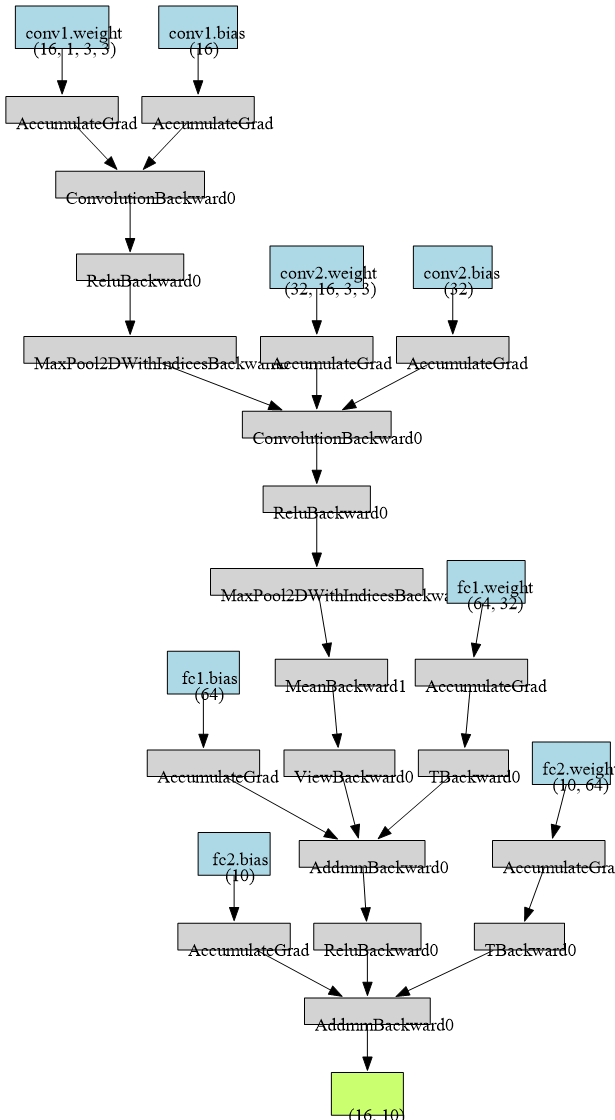

In [7]:
# Display the graph
from IPython.display import Image
Image("model_graph.png")

# Accessing model weights

To print all weights and biases, you can get them all from the model, using `.state_dict()` method, which returns `OrderedDict` object. Make sure to use `copy.deepcopy()`, otherwise the dict will contain references and modification to dict will be reflected in model too.

In [8]:
# Get all weights and biases and create an independent copy
state_dict = copy.deepcopy(model.state_dict())
# Print the OrderedDict to see what data is inside
print(state_dict)

OrderedDict({'conv1.weight': tensor([[[[-0.1025, -0.2683, -0.2688],
          [ 0.0737, -0.1186, -0.2880],
          [ 0.0732,  0.1940,  0.0863]]],


        [[[-0.2183, -0.2613,  0.2512],
          [ 0.2417, -0.0594, -0.0989],
          [ 0.1408,  0.1959,  0.2047]]],


        [[[ 0.2891, -0.2858, -0.2427],
          [-0.2998,  0.0107,  0.2651],
          [ 0.3289, -0.0027, -0.2598]]],


        [[[-0.3068,  0.0707,  0.1729],
          [ 0.2256,  0.3186,  0.2424],
          [ 0.1587, -0.1052, -0.3289]]],


        [[[ 0.0049,  0.1345,  0.1805],
          [-0.0391, -0.1926,  0.1591],
          [ 0.1350, -0.1550,  0.1385]]],


        [[[-0.0930,  0.1926, -0.1744],
          [ 0.2583,  0.0181,  0.1053],
          [ 0.2672,  0.0920, -0.1340]]],


        [[[-0.2710, -0.0658,  0.2044],
          [-0.2390,  0.0659,  0.1406],
          [ 0.0832,  0.2960,  0.0314]]],


        [[[-0.2359,  0.1907, -0.0791],
          [ 0.0787, -0.2043, -0.0505],
          [ 0.1606, -0.2253, -0.0052]]],


   

If you are interested to see the keys of `OrderedDict` we can use `.keys()` method.

In [9]:
print(state_dict.keys())

odict_keys(['conv1.weight', 'conv1.bias', 'conv2.weight', 'conv2.bias', 'fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias'])


We can also just go through all keys and access `OrderedDict` values by its keys.

In [10]:
for key in state_dict.keys():
    print("-" * 80)
    print(key)
    print(state_dict[key].shape)

--------------------------------------------------------------------------------
conv1.weight
torch.Size([16, 1, 3, 3])
--------------------------------------------------------------------------------
conv1.bias
torch.Size([16])
--------------------------------------------------------------------------------
conv2.weight
torch.Size([32, 16, 3, 3])
--------------------------------------------------------------------------------
conv2.bias
torch.Size([32])
--------------------------------------------------------------------------------
fc1.weight
torch.Size([64, 32])
--------------------------------------------------------------------------------
fc1.bias
torch.Size([64])
--------------------------------------------------------------------------------
fc2.weight
torch.Size([10, 64])
--------------------------------------------------------------------------------
fc2.bias
torch.Size([10])


Example: Access filter 5 weights in `conv1` layer. Remember that indexing starts with 0.

In [11]:
state_dict["conv1.weight"][5]

tensor([[[-0.0930,  0.1926, -0.1744],
         [ 0.2583,  0.0181,  0.1053],
         [ 0.2672,  0.0920, -0.1340]]])

# Modifying model weights

If we want to modify weights or biases, we can do that in two ways:
1. By modifying `state_dict` and then loading it back to `model` (recommended way).
2. Directly accessing `model` object members.

## Modifying state_dict

Lets change `bias` of `fc2` layer neuron 2 in `state_dict` first

In [12]:
# Check value of bias directly in model
print(f"Directly checking model. Bias = {model.fc2.bias.data[2]}")
# Check value of bias in state_dict
print(f"Checking state_dict. Bias = {state_dict["fc2.bias"][2]}")
# Modify state_dict
state_dict["fc2.bias"][2] = 1.5 # change fc2 layer neuron 2 bias in state_dict
# Check value of bias in state_dict
print(f"Checking state_dict. Bias = {state_dict["fc2.bias"][2]}")
# Check new value
print(f"Directly checking model. Bias = {model.fc2.bias.data[2]}")

Directly checking model. Bias = 0.0473785400390625
Checking state_dict. Bias = 0.0473785400390625
Checking state_dict. Bias = 1.5
Directly checking model. Bias = 0.0473785400390625


Now lets load modified `state_dict` into `model`

In [13]:
# Load the modified state_dict back into the model
model.load_state_dict(state_dict)

<All keys matched successfully>

Directly checking new value

In [14]:
# Check value of bias directly in model
print(f"Directly checking model. Bias = {model.fc2.bias.data[2]}")

Directly checking model. Bias = 1.5


## Directly accessing model object members

In [15]:
print(model.fc2.bias)

Parameter containing:
tensor([ 0.0737,  0.0577,  1.5000,  0.0798, -0.0814, -0.0090, -0.1158, -0.1195,
         0.0444,  0.0809], requires_grad=True)


The bias of the fc2 layer is stored in `model.fc2.bias`, which is a PyTorch tensor.
Use `.data` to modify in-place: Since `.bias` is a tensor, you can modify it directly using `model.fc2.bias.data`. Here, `model.fc2.bias.data[0]` accesses the bias of the first neuron (index 0).
To modify the value you can assign a new value, like 1.5 in this case.

In [16]:
# Directly changing value in model
model.fc2.bias.data[0] = 1.5

In [17]:
print(model.fc2.bias)

Parameter containing:
tensor([ 1.5000,  0.0577,  1.5000,  0.0798, -0.0814, -0.0090, -0.1158, -0.1195,
         0.0444,  0.0809], requires_grad=True)


## Freezing model layers

In some cases you don't want weights of some layer to change during training. For example we can reuse trained model on ImageNet, freeze the weights of first layers and train the rest of model to perform a different classification task. This way model training may be much faster.

Print all `conv1` layer parameters, by accessing them through `.parameters()` method

In [18]:
for param in model.conv1.parameters():
    print(param)

Parameter containing:
tensor([[[[-0.1025, -0.2683, -0.2688],
          [ 0.0737, -0.1186, -0.2880],
          [ 0.0732,  0.1940,  0.0863]]],


        [[[-0.2183, -0.2613,  0.2512],
          [ 0.2417, -0.0594, -0.0989],
          [ 0.1408,  0.1959,  0.2047]]],


        [[[ 0.2891, -0.2858, -0.2427],
          [-0.2998,  0.0107,  0.2651],
          [ 0.3289, -0.0027, -0.2598]]],


        [[[-0.3068,  0.0707,  0.1729],
          [ 0.2256,  0.3186,  0.2424],
          [ 0.1587, -0.1052, -0.3289]]],


        [[[ 0.0049,  0.1345,  0.1805],
          [-0.0391, -0.1926,  0.1591],
          [ 0.1350, -0.1550,  0.1385]]],


        [[[-0.0930,  0.1926, -0.1744],
          [ 0.2583,  0.0181,  0.1053],
          [ 0.2672,  0.0920, -0.1340]]],


        [[[-0.2710, -0.0658,  0.2044],
          [-0.2390,  0.0659,  0.1406],
          [ 0.0832,  0.2960,  0.0314]]],


        [[[-0.2359,  0.1907, -0.0791],
          [ 0.0787, -0.2043, -0.0505],
          [ 0.1606, -0.2253, -0.0052]]],


        [[

Now we need to disable gradient calculation via `requires_grad` flag before training the model

In [19]:
for param in model.conv1.parameters():
    param.requires_grad = False
    print(param)

Parameter containing:
tensor([[[[-0.1025, -0.2683, -0.2688],
          [ 0.0737, -0.1186, -0.2880],
          [ 0.0732,  0.1940,  0.0863]]],


        [[[-0.2183, -0.2613,  0.2512],
          [ 0.2417, -0.0594, -0.0989],
          [ 0.1408,  0.1959,  0.2047]]],


        [[[ 0.2891, -0.2858, -0.2427],
          [-0.2998,  0.0107,  0.2651],
          [ 0.3289, -0.0027, -0.2598]]],


        [[[-0.3068,  0.0707,  0.1729],
          [ 0.2256,  0.3186,  0.2424],
          [ 0.1587, -0.1052, -0.3289]]],


        [[[ 0.0049,  0.1345,  0.1805],
          [-0.0391, -0.1926,  0.1591],
          [ 0.1350, -0.1550,  0.1385]]],


        [[[-0.0930,  0.1926, -0.1744],
          [ 0.2583,  0.0181,  0.1053],
          [ 0.2672,  0.0920, -0.1340]]],


        [[[-0.2710, -0.0658,  0.2044],
          [-0.2390,  0.0659,  0.1406],
          [ 0.0832,  0.2960,  0.0314]]],


        [[[-0.2359,  0.1907, -0.0791],
          [ 0.0787, -0.2043, -0.0505],
          [ 0.1606, -0.2253, -0.0052]]],


        [[